# Prédiction de la distance d'arret avec Keras

## 1. Importation des modules

In [1]:
from keras.models import Sequential 
from keras import layers
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split as split
import matplotlib.pyplot as plt

## 2. Importation des données

In [2]:
data = np.loadtxt('data.txt')

x = data[:, 0].reshape (-1, 1)
y = data[:, 1]

x -= np.mean (x)
x /= np.std (x)

y -= np.mean (y)
y /= np.std (y)

xtrain, xtest, ytrain, ytest = split (x, y, train_size = 0.8)
xval, xtest, yval, ytest = split (xtest, ytest, train_size = 0.5)

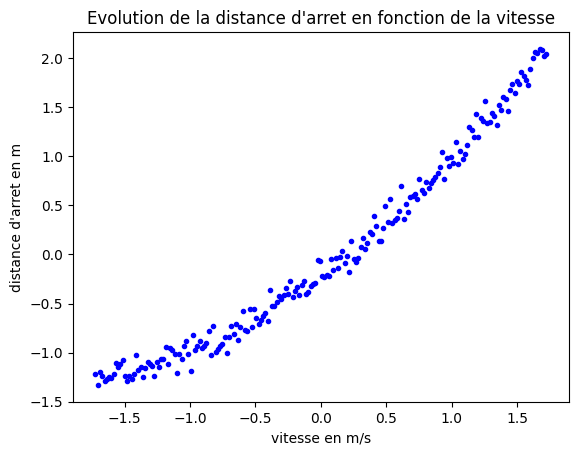

In [3]:
plt.plot (x, y, 'b.')
plt.title ("Evolution de la distance d'arret en fonction de la vitesse")
plt.xlabel ("vitesse en m/s")
plt.ylabel ("distance d'arret en m")
plt.show ()

## 3. Création du modèle

In [4]:
model = Sequential ()

model.add (layers.Input (shape = (1,)))

model.add (layers.Dense (32, activation = "relu"))
model.add (layers.Dense (32, activation = "relu"))
model.add (layers.Dense (1))

model.summary ()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Entrainement du modèle

In [5]:
model.compile (loss = "mse", metrics = ["mae", "mse"], optimizer = "rmsprop")

history = model.fit (xtrain, ytrain, epochs = 100, validation_data = (xval, yval))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9307 - mae: 0.8408 - mse: 0.9307 - val_loss: 0.5158 - val_mae: 0.6159 - val_mse: 0.5158
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6674 - mae: 0.7023 - mse: 0.6674 - val_loss: 0.3976 - val_mae: 0.5419 - val_mse: 0.3976
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5021 - mae: 0.5885 - mse: 0.5021 - val_loss: 0.3047 - val_mae: 0.4751 - val_mse: 0.3047
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4010 - mae: 0.5342 - mse: 0.4010 - val_loss: 0.2294 - val_mae: 0.4120 - val_mse: 0.2294
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3438 - mae: 0.4912 - mse: 0.3438 - val_loss: 0.1692 - val_mae: 0.3522 - val_mse: 0.1692
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2507 - mae: 0.4137 - mse: 0.2507 - val_loss: 0.1201 - val_mae: 0.2971 - val_mse: 0.1201
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1814 - mae: 0.3405 - mse: 0.1814 - val_loss: 0.0820 - val_

## 5. Visualisation des performances

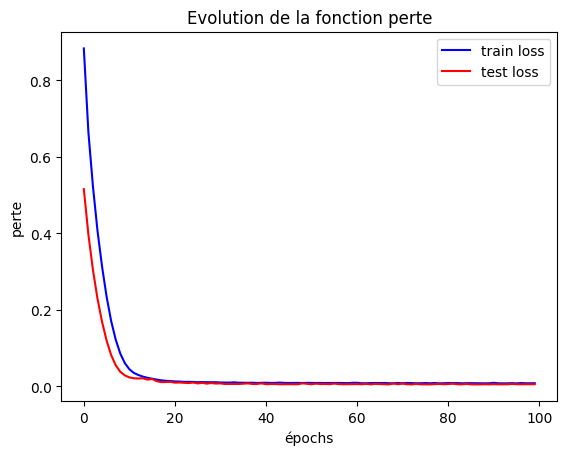

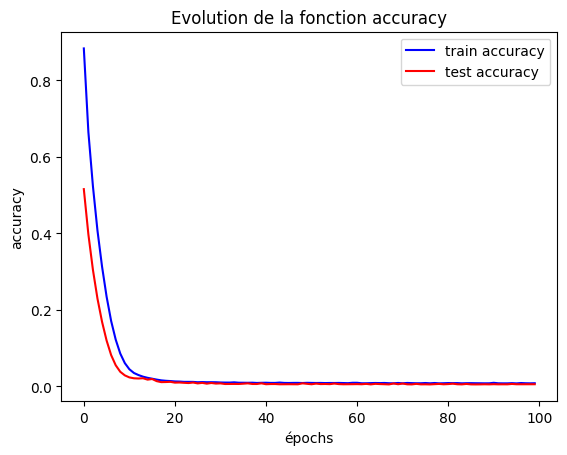

In [6]:
trainloss = history.history ["loss"]
testloss = history.history ["val_loss"]
trainaccuracy = history.history ["mse"]
testaccuracy = history.history ["val_mse"]

plt.plot (range (100), trainloss, 'b', label = "train loss")
plt.plot (range (100), testloss, 'r', label = "test loss")
plt.title ("Evolution de la fonction perte")
plt.xlabel ("épochs")
plt.ylabel ("perte")
plt.legend ()
plt.show ()

plt.plot (range (100), trainaccuracy, 'b', label = "train accuracy")
plt.plot (range (100), testaccuracy, 'r', label = "test accuracy")
plt.title ("Evolution de la fonction accuracy")
plt.xlabel ("épochs")
plt.ylabel ("accuracy")
plt.legend ()
plt.show ()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


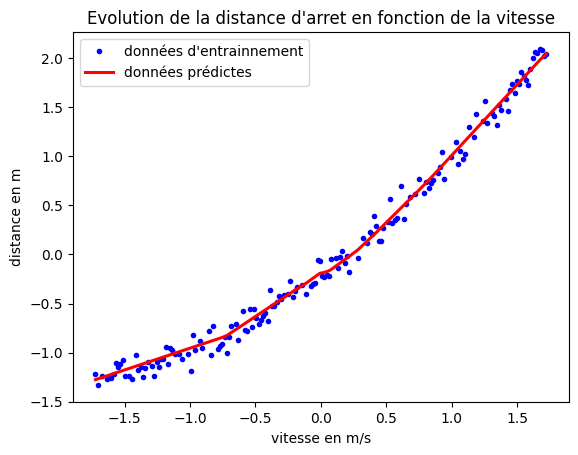

In [7]:
ypred = model.predict (xtrain)

plt.plot (xtrain, ytrain, 'b.', label = "données d'entrainnement")
plt.plot (sorted (xtrain), sorted (ypred), 'r', label = "données prédictes", linewidth = 2.2)
plt.title ("Evolution de la distance d'arret en fonction de la vitesse")
plt.xlabel ("vitesse en m/s")
plt.ylabel ("distance en m")
plt.legend ()
plt.show ()

In [8]:
loss, mae, mse = model.evaluate (xtest, ytest, verbose = 1)
print (f" ")
print (f" Le modèle commet une erreur d'environ {mae*100} centimetres pour chaque vitesse")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mae: 0.0677 - mse: 0.0070
 
 Le modèle commet une erreur d'environ 6.767352670431137 centimetres pour chaque vitesse
